In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import linregress

import sys 
import os
path = os.path.dirname(os.getcwd())
sys.path.append(path)
from lib import *

In [7]:
# Results Import
optimization_result = pd.read_csv("../results/1_optimization_result.csv")
baseline_result = pd.read_csv("../results/2_baseline.csv")
simpleCA_result = pd.read_csv("../results/3_simpleCA_result.csv")
#op_baseline_result = pd.read_csv("../results/baselineOptimization_result.csv")


# Data Import
df = pd.read_csv(r'../data/DE_2021.csv')
ci_data_2021_hourly = df['carbon_intensity_avg']
df = pd.read_csv(r'../data/projectcount_wikiDE_2015.csv')
clickData_hourly_2015 = df["De"].tolist()
clickData_hourly_2015 = clickData_hourly_2015[24:] + clickData_hourly_2015[0:24]

# Carbon Emission - Revenue (Ratio)

In [102]:
opti = []
simple = []
op = []
for i in range(8760):
    opti.append([optimization_result["user-throughput"][i],()])
    simple.append([simpleCA_result["user-throughput"][i],(simpleCA_result["ed"][i]*ci_data_2021_hourly)])
    #op.append([op_baseline_result["q"][i],(op_baseline_result["ed"][i]*ci_data_2021_hourly)])

In [103]:

# sort?
opti = pd.DataFrame({'ce': [optimization_result["ce"][i] for i in range(8760)],
                   'q': optimization_result["user-throughput"], 'Experiment': 'Selective Optimization Approach'})
simple = pd.DataFrame({'ce': [simpleCA_result["ce"][i] for i in range(8760)],
                   'q': simpleCA_result["user-throughput"], 'Experiment': 'Simple carbon-aware'})
#op = pd.DataFrame({'ed': [op_baseline_result["ed"][i]*ci_data_2021_hourly[i] for i in range(8760)],
#                   'q': op_baseline_result["q"],'Experiment': 'Mathematical Optium'})


""" data = pd.concat(dict(a1=opti, a2=simple, a3=op), axis=1)
data = data.stack().stack()
print(data[:19]) """


' data = pd.concat(dict(a1=opti, a2=simple, a3=op), axis=1)\ndata = data.stack().stack()\nprint(data[:19]) '

## Comparing the 2 Carbon-Aware Approaches

/tmp/ipykernel_574684/2918056031.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ceToQ.set_yticklabels([0,0,1,2,3,4,5,6,7], fontdict={'size': 15})
/tmp/ipykernel_574684/2918056031.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ceToQ.set_xticklabels([0.0,0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4], fontdict={'size': 15})


Text(0, 0.5, 'Carbon emissions (in tCO2eq)')

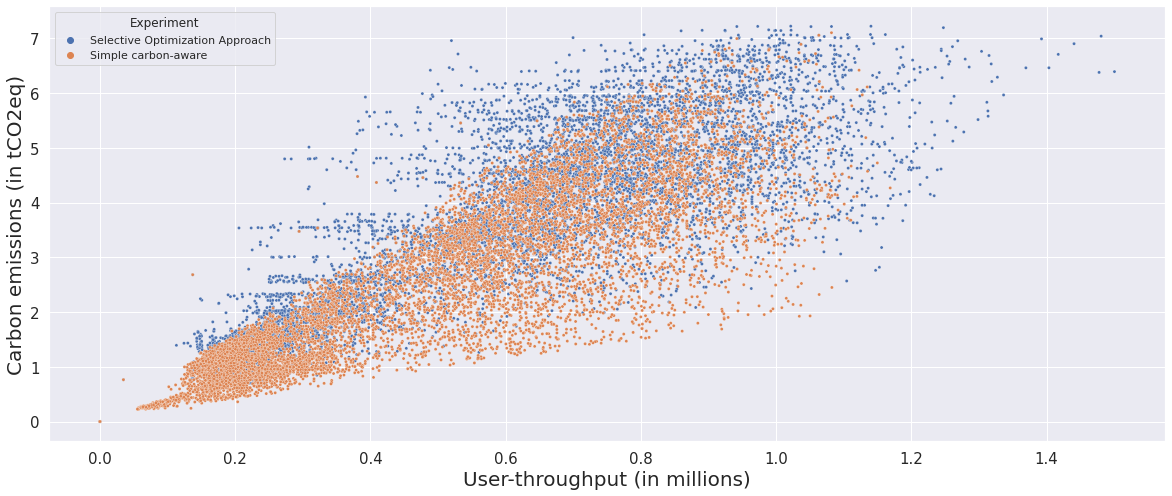

In [104]:
# Seaborn Figure size
sns.set(rc={'figure.figsize':(20,8)})

y_upperLimit = 2.5

keys=['Opti', 'Simple']
data = pd.concat([opti, simple], axis=0, keys=keys)
#data = pd.DataFrame({'q': opti, 'q_simple': simple})
ceToQ = sns.scatterplot(data=data, x='q', y='ce', hue='Experiment', s=10)

#ceToQ.set(xlim=(0,1500100),ylim=(0,11000000))


ceToQ.set_yticklabels([0,0,1,2,3,4,5,6,7], fontdict={'size': 15})
ceToQ.set_xticklabels([0.0,0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4], fontdict={'size': 15})

#ceToQ.set(xlim=(0,8760))
ceToQ.set_xlabel('User-throughput (in millions)', fontdict={'size': 20})
ceToQ.set_ylabel('Carbon emissions (in tCO2eq)', fontdict={'size': 20})

#ceToQ.axes.set_title("Carbon Emission to Revenue Ratio",fontsize=20)

In [105]:
# Save plot to disk
fig = ceToQ.get_figure()
fig.savefig("../img/comparingCEtoQRatio_cdf1.png", bbox_inches = 'tight')

## Add a regression line

/tmp/ipykernel_574684/3599684185.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ceToQ.set_yticklabels([0,1,2,3,4,5,6,7], fontdict={'size': 15})
/tmp/ipykernel_574684/3599684185.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ceToQ.set_xticklabels([0.0,0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4], fontdict={'size': 15})


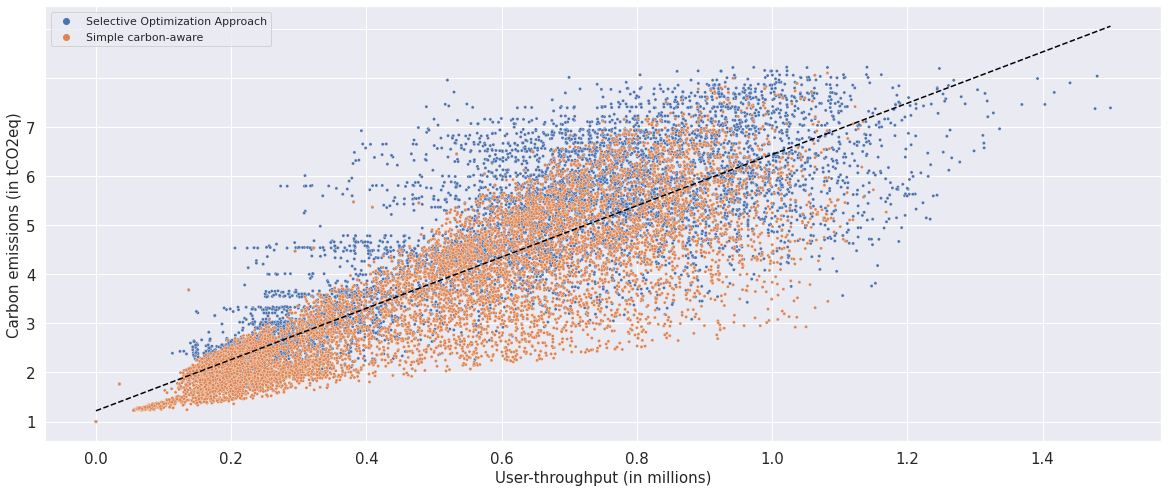

In [106]:
slope, intercept, r_value, p_value, std_err = linregress(data['q'], data['ce'])
ceToQ = sns.scatterplot(data=data, x='q', y='ce', hue='Experiment', s=10)
# Plot the regression line
x_vals = np.linspace(data['q'].min(), data['q'].max(), 100)
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color='black', linestyle='--')

ceToQ.set_yticklabels([0,1,2,3,4,5,6,7], fontdict={'size': 15})
ceToQ.set_xticklabels([0.0,0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4], fontdict={'size': 15})


ceToQ.set_xlabel('User-throughput (in millions)', fontdict={'size': 15})
ceToQ.set_ylabel('Carbon emissions (in tCO2eq)', fontdict={'size': 15})

plt.legend()
plt.show()

# Test

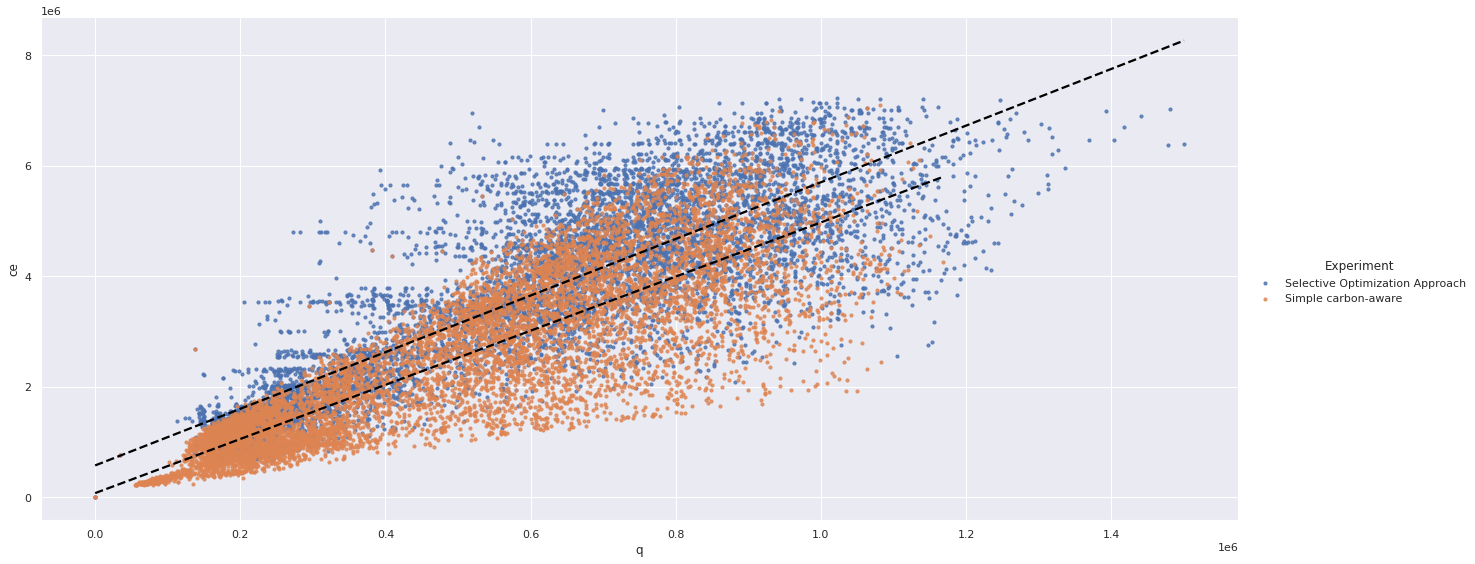

In [107]:
palette = {'Selective Optimization Approach': 'blue', 'Simple carbon-aware': 'red'}
f = sns.lmplot(data=data, x='q', y='ce', hue='Experiment', height=8,legend=True, aspect=2.2, ci = None,
               scatter_kws={'s':10},line_kws={'color':'black','linestyle':'--'})

/tmp/ipykernel_574684/2035941860.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ceToQ_regressionL.set_yticklabels([0,0,2,4,6,8,10], fontdict={'size': 15})
/tmp/ipykernel_574684/2035941860.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ceToQ_regressionL.set_xticklabels([0.0,0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4], fontdict={'size': 15})


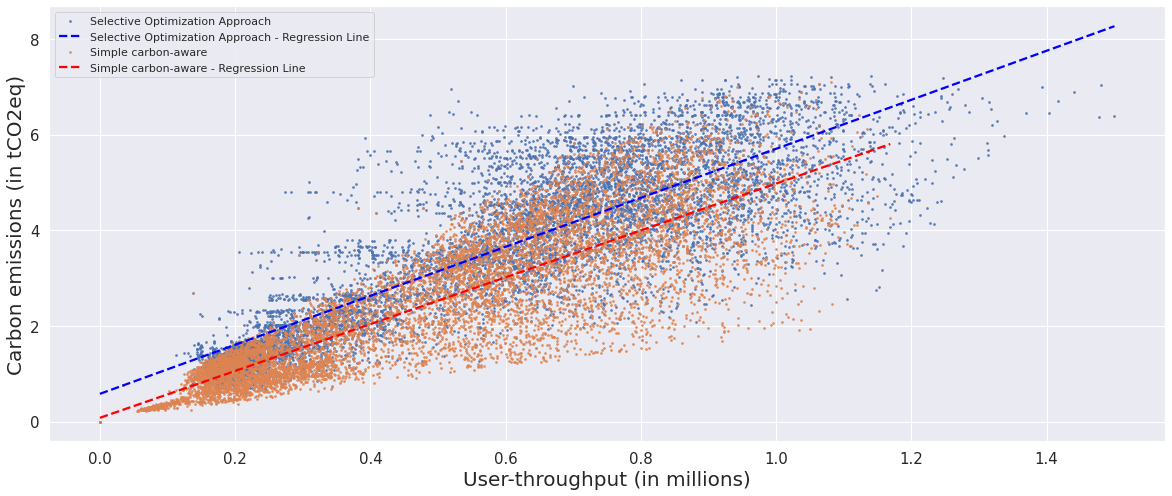

In [115]:
ceToQ_regressionLine = sns.regplot(x='q', y='ce', data=opti, scatter_kws={'s':3}, line_kws={'color': 'blue','linestyle':'--'}, ci=None)

# Create a regplot for the second dataset on the same axes
ceToQ_regressionL  = sns.regplot(x='q', y='ce', data=simple, scatter_kws={'s':3}, line_kws={'color': 'red','linestyle':'--'}, ax=ceToQ_regressionLine, ci=None)

ceToQ_regressionL.set_xlabel('User-throughput (in millions)', fontdict={'size': 20})
ceToQ_regressionL.set_ylabel('Carbon emissions (in tCO2eq)', fontdict={'size': 20})

ceToQ_regressionL.set_yticklabels([0,0,2,4,6,8,10], fontdict={'size': 15})
ceToQ_regressionL.set_xticklabels([0.0,0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4], fontdict={'size': 15})

#g.plot(sns.regplot)

ceToQ_regressionLine.legend(['Selective Optimization Approach', 'Selective Optimization Approach - Regression Line',
'' 'Simple carbon-aware', 'Simple carbon-aware - Regression Line'])


In [116]:
# Save plot to disk
fig = ceToQ_regressionLine.get_figure()
fig.savefig("../img/comparingCEtoQRatio_regression.png", bbox_inches = 'tight')

# Regression Line

In [98]:
opti = pd.DataFrame({'ce': [optimization_result["ce"][i] for i in range(8760)],
                   'q': optimization_result["q"], 'Experiment': 'Selective Optimization Approach'})
simple = pd.DataFrame({'ce': [simpleCA_result["ce"][i] for i in range(8760)],
                   'q': simpleCA_result["q"], 'Experiment': 'Simple carbon-aware'})

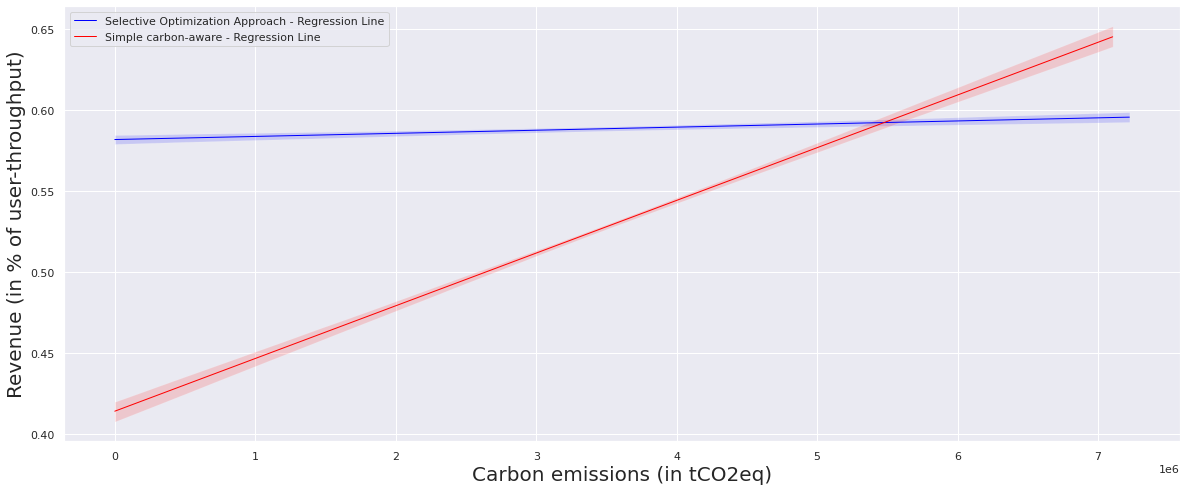

In [100]:
#g = sns.JointGrid(x=data["user-throughput"], y=data["ce"], data=data)
#g.plot(sns.regplot, sns.histplot)
ceToQ_regressionLine = sns.regplot(x='ce', y='q', data=opti, line_kws={'color': 'blue','linewidth':1},
                                   scatter=False, label="Selective Optimization Approach - Regression Line")

# Create a regplot for the second dataset on the same axes
ceToQ_regressionL  = sns.regplot(x='ce', y='q', data=simple, line_kws={'color': 'red','linewidth':1},
                                  ax=ceToQ_regressionLine, scatter=False, label="Simple carbon-aware - Regression Line")

ceToQ_regressionL.set_ylabel('Revenue (in % of user-throughput)', fontdict={'size': 20})
ceToQ_regressionL.set_xlabel('Carbon emissions (in tCO2eq)', fontdict={'size': 20})

#ceToQ_regressionL.set_xticklabels([0,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5], fontdict={'size': 15})
#ceToQ_regressionL.set_yticklabels([0.0,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1.0], fontdict={'size': 15})

#g.plot(sns.regplot)

ceToQ_regressionL.legend()


In [ ]:
# Save plot to disk
# fig = ceToQ_regressionLine.get_figure()
# fig.savefig("../img/comparingCEtoQRatio_regression.png", bbox_inches = 'tight')

## With Optimum

Text(0.5, 1.0, 'Carbon Emission to Revenue Ratio')

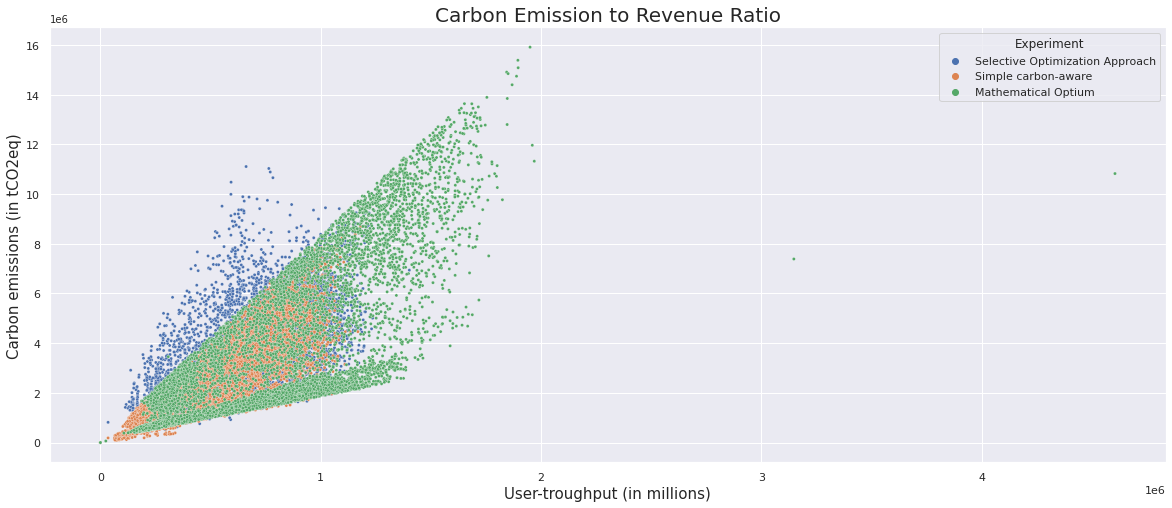

In [ ]:

keys=['Opti', 'Simple', 'Optimal']
data = pd.concat([opti, simple, op], axis=0, keys=keys)
#data = pd.DataFrame({'q': opti, 'q_simple': simple})
ceToQ = sns.scatterplot(data=data, x='q', y='ed', hue='Experiment', s=10)



def millions_formatter(x, pos):
    return f"{int(x / 10**6)}"

#ceToQ.set(xlim=(0,8760))
ceToQ.set_xlabel('User-troughput (in millions)', fontdict={'size': 15})
ceToQ.set_ylabel('Carbon emissions (in tCO2eq)', fontdict={'size': 15})
ceToQ.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

plt.text(0.0,1.03, "1e6", transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', horizontalalignment='left')

ceToQ.axes.set_title("Carbon Emission to Revenue Ratio",fontsize=20)

In [ ]:
# Save plot to disk
fig = ceToQ.get_figure()
fig.savefig("../img/comparingCEtoQRatio_cd2.png", bbox_inches = 'tight')

# CDF

# New (Hour in Week Mean)

In [ ]:
# 01.01.2021 was a Friday and 31.12.2021 was a Friday
weekday_frequency2021 = [52,52,52,52,53,52,52]

opti, simple = [0] * 168, [0] * 168
opti_ce, simple_ce = [0] * 168, [0] * 168
for i in range(8760):
    index = (i+96) % 168
    opti[index] = optimization_result["q"][i]
    simple[index] = simpleCA_result["q"][i]
    opti_ce[index] = optimization_result["ed"][i]*ci_data_2021_hourly[i]
    simple_ce[index] = simpleCA_result["ed"][i]*ci_data_2021_hourly[i]

for i in range(7):
    for j in range(24):
        index = (i*24)+j
        opti_ce[index] = opti_ce[index]/weekday_frequency2021[i]
        simple_ce[index] = simple_ce[index]/weekday_frequency2021[i]
        opti[index] = opti[index]/weekday_frequency2021[i]
        simple[index] = simple[index]/weekday_frequency2021[i]

Text(0, 0.5, 'User throughput')

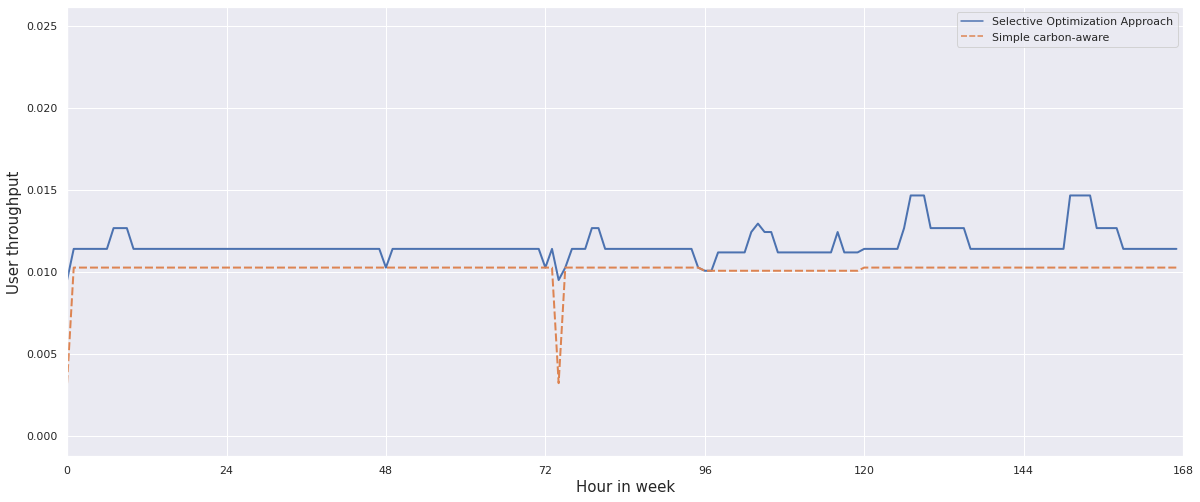

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})

data = pd.DataFrame({'Selective Optimization Approach': opti, 'Simple carbon-aware': simple})

ax = sns.lineplot(data=data, linewidth=2)
#plt.xticks([i*24 for i in range(8)])
#plt.yticks([5500000 + (i*500000) for i in range(8)])
ax.set(xlim=(0,168))
xlabels = [i*24 for i in range(8)]
ax.set_xticks(xlabels)

# Standard Deviation
a = np.array(opti)
b = np.array(simple)
lower_bound = a - b
upper_bound = a + b
plt.fill_between(lower_bound, upper_bound, alpha=.3)

ax.set_xlabel('Hour in week', fontdict={'size': 15})
ax.set_ylabel('User throughput', fontdict={'size': 15})
#ax.set_title('Hour in Week', fontdict={'size': 24, 'weight': 'bold'})

In [ ]:
ceToQ = sns.scatterplot(data=data, x='q', y='ed', hue='Experiment', s=10)

ValueError: Could not interpret value `q` for parameter `x`

# blabla

In [ ]:
print(len(opti),len(opti_ce))

168 168


In [ ]:
opti0 = pd.DataFrame({'ed': opti_ce,
                   'user-throughput': opti, 'Experiment': 'Seleective Optimization Approach'})
simple0 = pd.DataFrame({'ed': simple_ce,
                   'user-throughput': simple,  'Experiment': 'Simple Approach'})

AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

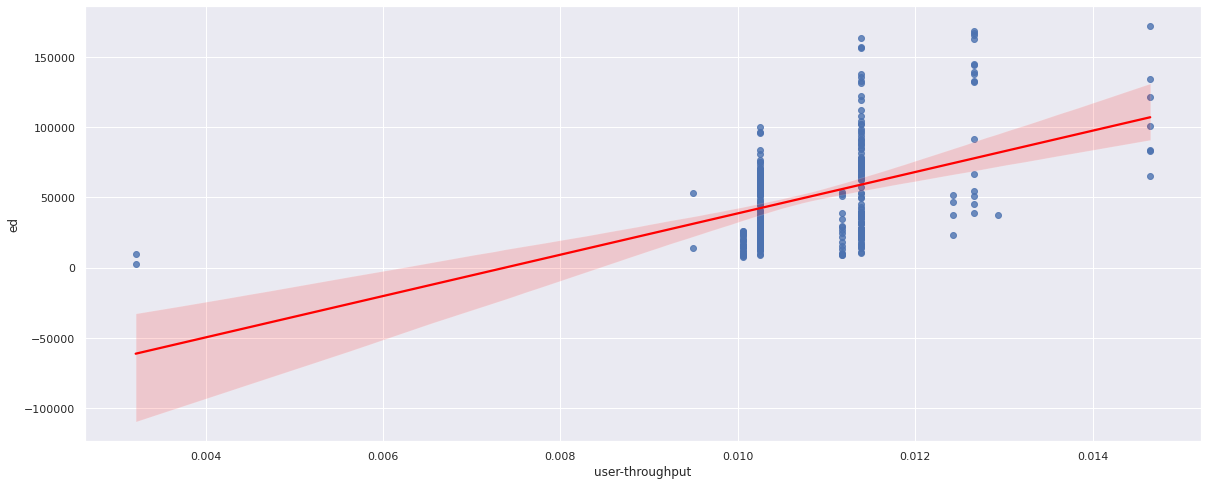

In [ ]:
# Seaborn Figure size
sns.set(rc={'figure.figsize':(20,8)})


keys=['Opti', 'Simple']
data = pd.concat([opti0, simple0], axis=0, keys=keys)
#data = pd.DataFrame({'q': opti, 'q_simple': simple})
ceToQ_meanWeek = sns.regplot(data=data, x='user-throughput', y='ed',line_kws = {"color": "red"})#, hue='Experiment', , s=20

#ceToQ_meanWeek.set(xlim=(0,1500100),ylim=(0,11000000))

#ceToQ.set(xlim=(0,8760))
ceToQ_meanWeek.xlabel('User-troughput (in millions)', fontdict={'size': 20})
ceToQ_meanWeek.ylabel('Carbon emissions (in tCO2eq)', fontdict={'size': 20})

#ceToQ.axes.set_title("Carbon Emission to Revenue Ratio",fontsize=20)

# CDF

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})

data = pd.DataFrame({'Hourly Optimization Approach': sorted(opti), 'Simple carbon-aware': sorted(simple)})

ax = sns.lineplot(data=data, linewidth=2)
#plt.xticks([i*24 for i in range(8)])
#plt.yticks([5500000 + (i*500000) for i in range(8)])
#ax.set(xlim=(0,100))
ax.set_xlabel('Hour in week', fontdict={'size': 15})
ax.set_ylabel('User throughput', fontdict={'size': 15})
#ax.set_title('Hour in Week', fontdict={'size': 24, 'weight': 'bold'})